<a href="https://colab.research.google.com/github/ankitbittu/Telecom-Churn-Analysis/blob/main/Copy_of_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Almabetter/Capstone project 1/Copy of Telecom Churn.csv'
telecom_df=pd.read_csv(file_path)

In [122]:
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charges
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,75.56
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,59.24
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,62.29
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,66.80
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,52.09


In [ ]:
telecom_df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
telecom_df.shape

(3333, 20)

In [ ]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

There are no any null values present in any row

There are also different kinds of dtype objects are present.

Converting the dtype of International plan and Voice mail plan from object to bool.


In [ ]:
telecom_df['International plan'] = telecom_df['International plan'].replace({'Yes':True,'No':False})
telecom_df['Voice mail plan'] = telecom_df['Voice mail plan'].replace({'Yes':True,'No':False})

In [ ]:
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Finding total number of churned users

In [ ]:
telecom_df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

Out of the total 3333 customers, 2850 customers are retained and the rest 483 are churning the telecom service.

In [ ]:
Percent_churned_users = round((telecom_df['Churn'].mean() * 100),3)
Percent_churned_users

14.491

In [ ]:
Percent_unchurned_users = round((100 - Percent_churned_users),3)
Percent_unchurned_users

85.509

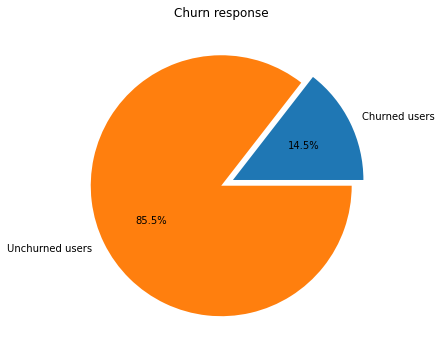

In [ ]:
x = [Percent_churned_users, Percent_unchurned_users]
labels = ['Churned users', 'Unchurned users']
explode = [0.1, 0]

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(x, labels = labels,explode = explode, autopct='%1.1f%%')
ax.set_title('Churn response')
plt.show()

In [ ]:
telecom_df.describe(include = ['object','bool'])

,State,International plan,Voice mail plan,Churn
count,3333,3333,3333,3333
unique,51,2,2,2
top,WV,False,False,False
freq,106,3010,2411,2850


In [ ]:
telecom_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [102]:
#churned_users = telecom_df[telecom_df['Churn'] == True]
#unchurned_users = telecom_df[telecom_df['Churn'] == False]

In [109]:
churned_users.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Total charges
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.00000,483.000000,483.000000,483.000000,483.000000
mean,102.664596,437.817805,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.70000,4.163561,2.889545,2.229814,65.355963
std,39.467820,42.792270,11.860138,68.997792,21.582307,11.729710,51.728910,19.724711,4.396762,47.132825,19.950659,2.121081,2.79319,2.551575,0.754152,1.853275,13.885268
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,70.900000,48.000000,6.030000,47.400000,49.000000,2.130000,2.00000,1.000000,0.540000,0.000000,22.930000
25%,76.000000,408.000000,0.000000,153.250000,87.500000,26.055000,177.100000,87.000000,15.055000,171.250000,85.000000,7.705000,8.80000,2.000000,2.380000,1.000000,53.425000
50%,103.000000,415.000000,0.000000,217.600000,103.000000,36.990000,211.300000,101.000000,17.960000,204.800000,100.000000,9.220000,10.60000,4.000000,2.860000,2.000000,66.910000
75%,127.000000,510.000000,0.000000,265.950000,116.500000,45.210000,249.450000,114.000000,21.205000,239.850000,115.000000,10.795000,12.80000,5.000000,3.460000,4.000000,76.655000
max,225.000000,510.000000,48.000000,350.800000,165.000000,59.640000,363.700000,168.000000,30.910000,354.900000,158.000000,15.970000,20.00000,20.000000,5.400000,9.000000,96.150000


In [110]:
unchurned_users.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Total charges
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,100.793684,437.074737,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825,58.448807
std,39.882350,42.306156,13.913125,50.181655,19.801157,8.530835,50.292175,19.958414,4.274863,51.105032,19.506246,2.299768,2.784489,2.441984,0.751784,1.163883,9.458436
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,23.250000
25%,73.000000,408.000000,0.000000,142.825000,87.000000,24.282500,164.500000,87.000000,13.980000,165.900000,87.000000,7.470000,8.400000,3.000000,2.270000,1.000000,52.220000
50%,100.000000,415.000000,0.000000,177.200000,100.000000,30.120000,199.600000,100.000000,16.970000,200.250000,100.000000,9.010000,10.200000,4.000000,2.750000,1.000000,58.920000
75%,127.000000,510.000000,22.000000,210.300000,114.000000,35.750000,233.200000,114.000000,19.820000,234.900000,113.000000,10.570000,12.000000,6.000000,3.240000,2.000000,65.137500
max,243.000000,510.000000,51.000000,315.600000,163.000000,53.650000,361.800000,170.000000,30.750000,395.000000,175.000000,17.770000,18.900000,19.000000,5.100000,8.000000,87.290000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


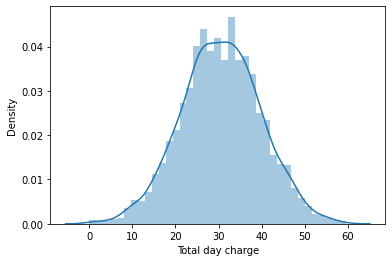

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


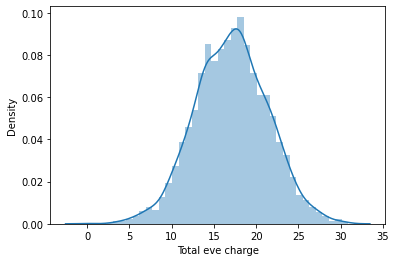

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


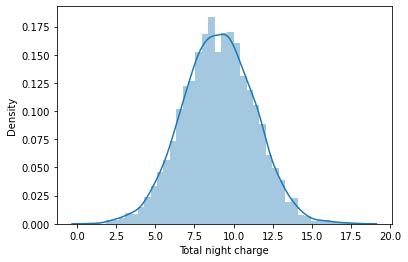

In [ ]:
sb.distplot(telecom_df['Total day charge'])
plt.show()
sb.distplot(telecom_df['Total eve charge'])
plt.show()
sb.distplot(telecom_df['Total night charge'])
plt.show()

From above results, it can be seen that charges incurred for day minutes is way more costlier than the those of evening and night minutes.

In [ ]:
telecom_df['Total charges'] = telecom_df['Total day charge'] + telecom_df['Total eve charge'] + telecom_df['Total night charge'] + telecom_df['Total intl charge']

In [ ]:
Intl_plan_true_df  = telecom_df[telecom_df['International plan'] == True]     # Those who have taken the international plan
Intl_plan_false_df  = telecom_df[telecom_df['International plan'] == False]   # Those who have not taken the international plan

In [ ]:
Intl_plan_true_df['Total intl charge'].describe()

count    323.000000
mean       2.869907
std        0.728151
min        0.350000
25%        2.430000
50%        2.920000
75%        3.290000
max        5.400000
Name: Total intl charge, dtype: float64

In [ ]:
Intl_plan_false_df['Total intl charge'].describe()

count    3010.000000
mean        2.753279
std         0.755716
min         0.000000
25%         2.270000
50%         2.750000
75%         3.270000
max         5.100000
Name: Total intl charge, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


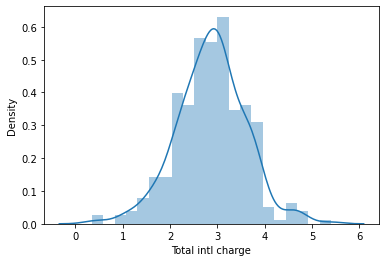

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


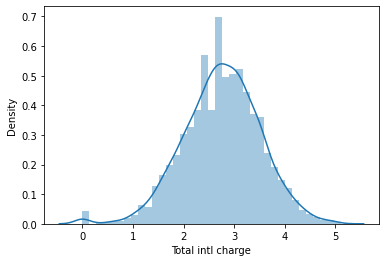

In [ ]:
sb.distplot(Intl_plan_true_df['Total intl charge'])
plt.show()
sb.distplot(Intl_plan_false_df['Total intl charge'])
plt.show()

Customers who are using the international plans as well as the customers who are not using it are paying almost same charges for the international calls.

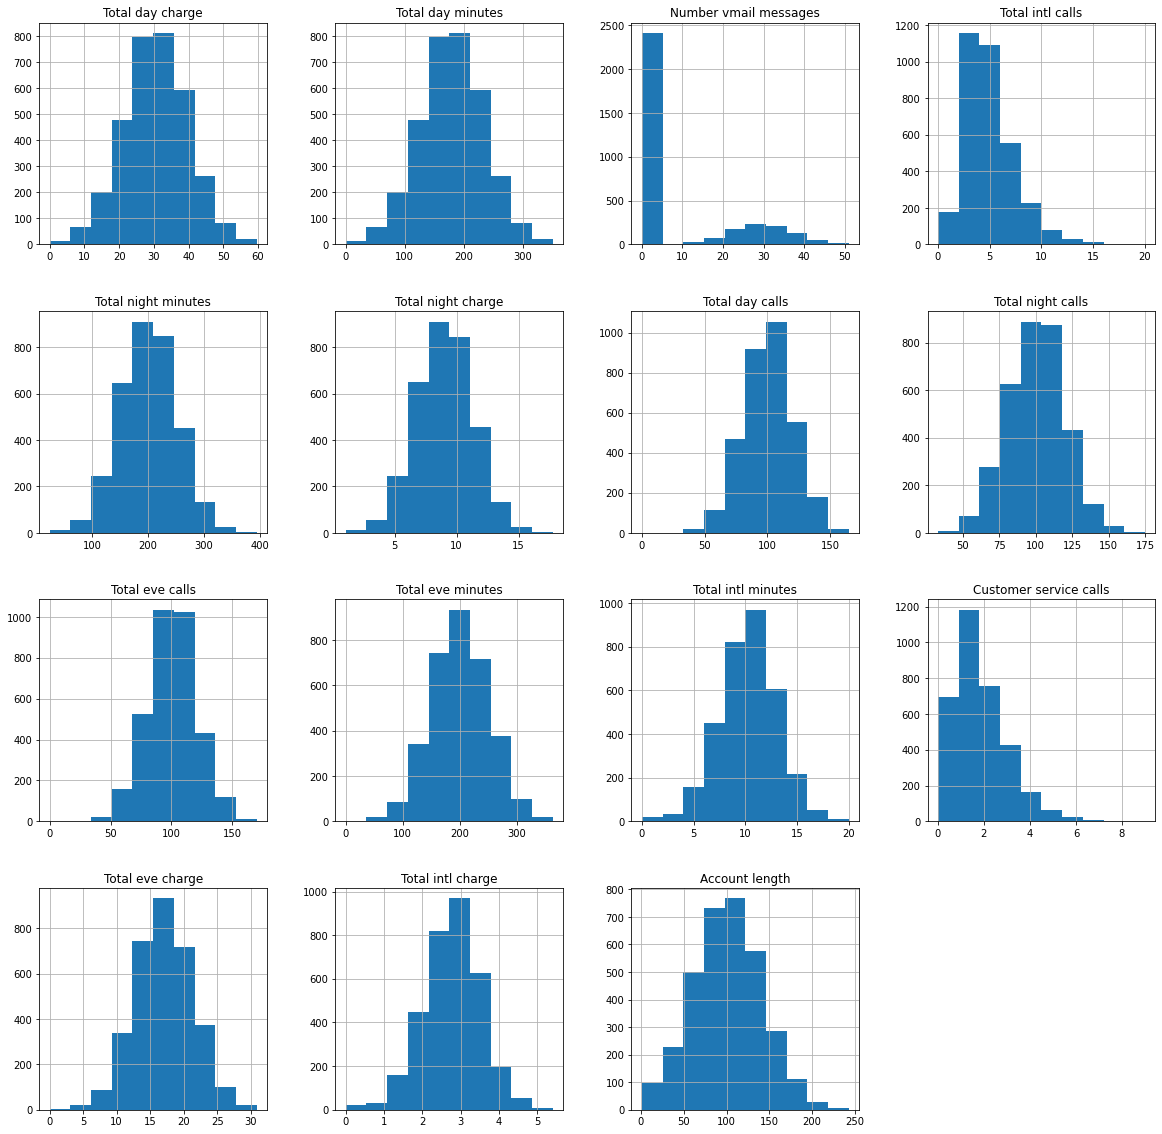

In [ ]:
telecom_df[numerical].hist(figsize=(20,20));

In [ ]:
telecom_df['International plan'].value_counts()

False    3010
True      323
Name: International plan, dtype: int64

In [ ]:
telecom_df['Voice mail plan'].value_counts()

False    2411
True      922
Name: Voice mail plan, dtype: int64

Area code wise Churned users

In [ ]:
telecom_df.groupby('Area code')['Churn'].value_counts()

Area code  Churn
408        False     716
           True      122
415        False    1419
           True      236
510        False     715
           True      125
Name: Churn, dtype: int64

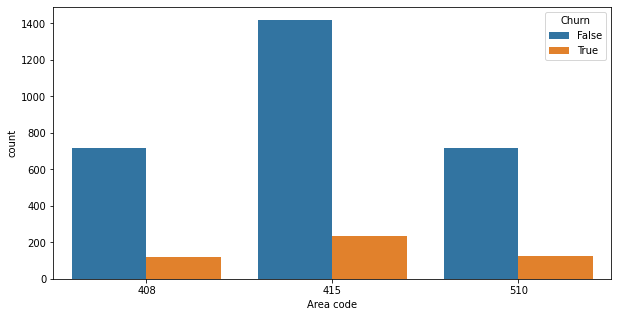

In [ ]:
plt.figure(figsize=(10,5))
ax = sb.countplot(data = telecom_df, x = 'Area code', hue = 'Churn')

In [68]:
pd.pivot_table(telecom_df,index=['Area code'],values=['Churn'])

,Churn
Area code,
408,0.145585
415,0.142598
510,0.148810


In [ ]:
area_churn = pd.pivot_table(telecom_df,index=['Area code'],values=['Churn'])
area_churn['area_code'] = area_churn.index

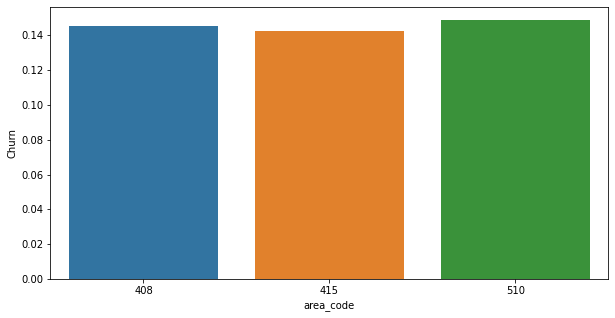

In [67]:
plt.figure(figsize=(10,5))
sb.barplot(y='Churn', x='area_code', data=area_churn)


State wise churned customers

In [ ]:
pd.crosstab(telecom_df['State'], telecom_df['Churn'], margins=True)

Churn,False,True,All
State,,,
AK,49,3,52
AL,72,8,80
AR,44,11,55
AZ,60,4,64
CA,25,9,34
CO,57,9,66
CT,62,12,74
DC,49,5,54
DE,52,9,61


In [79]:
state_churn = pd.pivot_table(telecom_df,index=['State'],values=['Churn'], aggfunc = np.mean)
state_churn = state_churn.sort_values(by = 'Churn', ascending = False)
state_churn

,Churn
State,
NJ,0.264706
CA,0.264706
TX,0.250000
MD,0.242857
SC,0.233333
MI,0.219178
MS,0.215385
NV,0.212121
WA,0.212121


In [74]:
#state_churn = pd.pivot_table(telecom_df,index=['State'],values=['Churn'], aggfunc = np.mean)
#state_churn = state_churn.sort_values(by = 'Churn', ascending = False)
state_churn['state name'] = state_churn.index

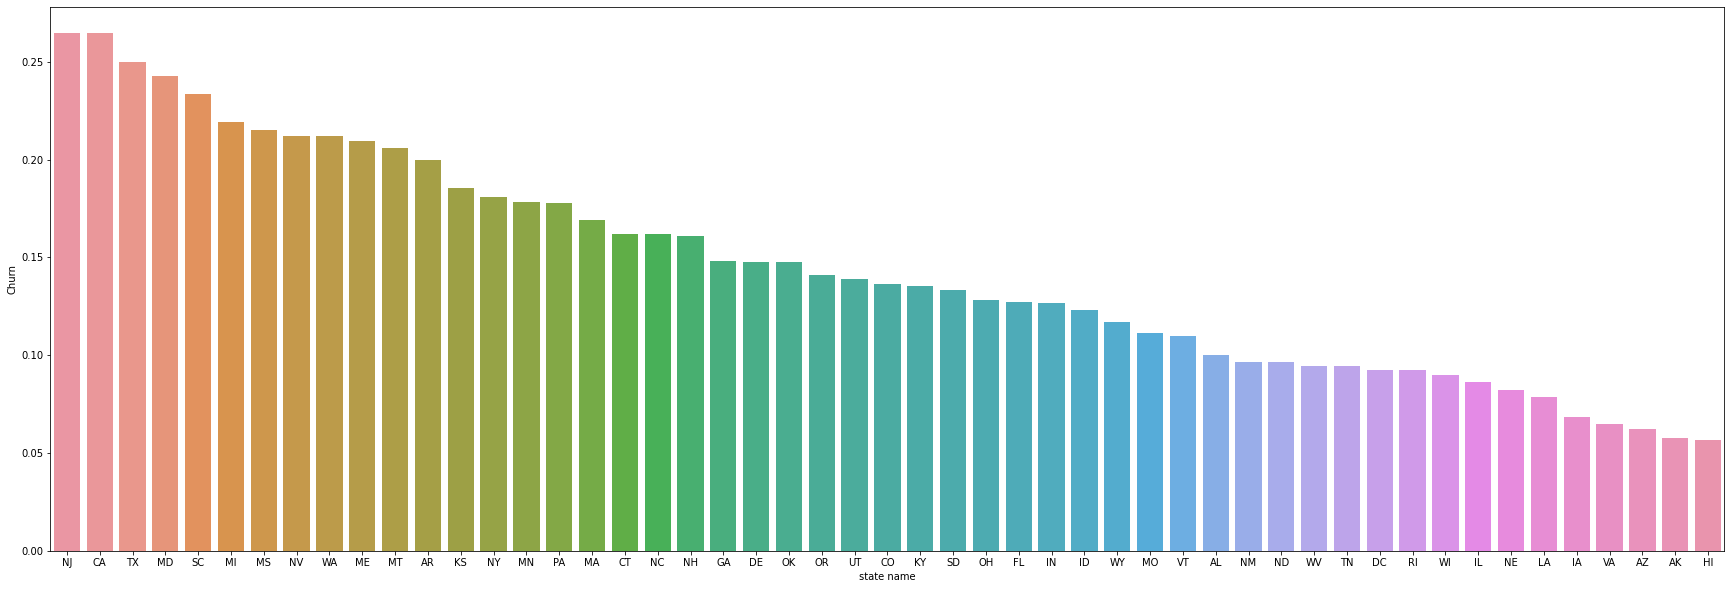

In [75]:
plt.figure(figsize=(30,10))
sb.barplot(y='Churn', x='state name', data=state_churn)

Considering Voice mail plan in the next part. In this, the proportion of users who are churning with respect to the their voice mail plan is found out.

In [87]:
pd.crosstab(telecom_df["Voice mail plan"], telecom_df["Churn"])

Churn,False,True
Voice mail plan,,
False,2008,403
True,842,80


In [88]:
telecom_df.groupby(['Voice mail plan'])['Churn'].agg([np.mean]).rename(columns = {'mean':'churn_rate'})

,churn_rate
Voice mail plan,
False,0.167151
True,0.086768


Those who have not taken the voice mail plan are churning more with respect to those who have taken the plan.

In [80]:
voice_mail_churn = telecom_df.groupby(['Voice mail plan'])['Churn'].agg([np.mean]).rename(columns = {'mean':'churn_rate'})
voice_mail_churn['voice_plan'] = voice_mail_churn.index

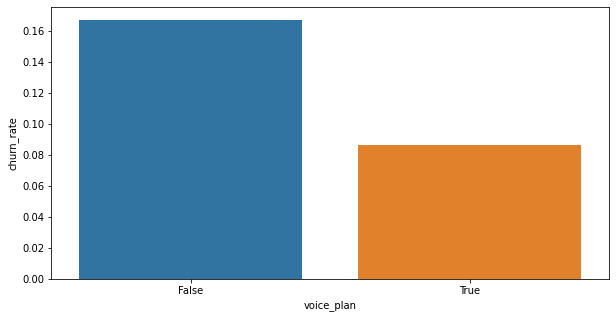

In [81]:
plt.figure(figsize=(10,5))
sb.barplot(y='churn_rate', x = 'voice_plan', data=voice_mail_churn)

Taking Internation plan with respect to churn.

In [82]:
pd.crosstab(telecom_df["International plan"], telecom_df["Churn"])


Churn,False,True
International plan,,
False,2664,346
True,186,137


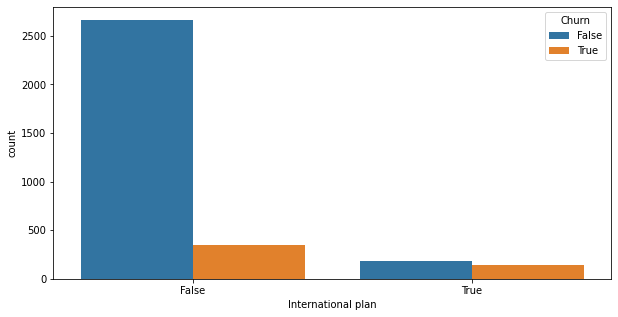

In [83]:
plt.figure(figsize=(10,5))
plot = sb.countplot(x='International plan', hue='Churn', data=telecom_df)



In [84]:
telecom_df.groupby(['International plan'])['Churn'].agg([np.mean]).rename(columns = {'mean':'churn_rate'})

,churn_rate
International plan,
False,0.114950
True,0.424149


In [85]:
Intl_churn = telecom_df.groupby(['International plan'])['Churn'].agg([np.mean]).rename(columns = {'mean':'churn_rate'})
Intl_churn['Intl plan'] = Intl_churn.index


In [ ]:
#Intl_churn_table = pd.pivot_table(telecom_df, values='Churn', index=['International plan'], aggfunc=[len,np.sum,np.mean])
#Intl_churn_table

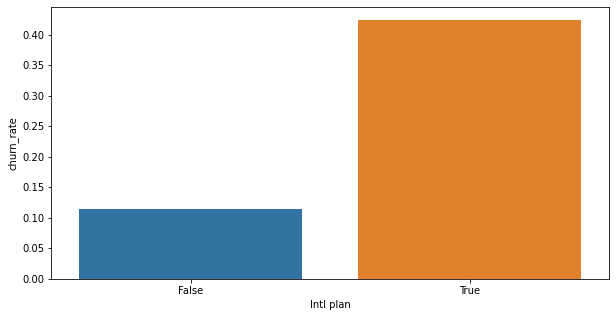

In [86]:
plt.figure(figsize=(10,5))
sb.barplot(y='churn_rate', x = 'Intl plan', data=Intl_churn)

The result clearly shows that the users who has International plan are churning more with respect to the users who haven't. 

Now considering the Customer service calls with respect to churn.

In [92]:
pd.crosstab(telecom_df["Customer service calls"], telecom_df["Churn"])

Churn,False,True
Customer service calls,,
0,605,92
1,1059,122
2,672,87
3,385,44
4,90,76
5,26,40
6,8,14
7,4,5
8,1,1


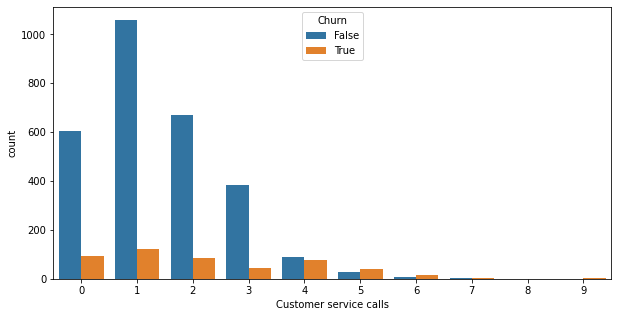

In [ ]:
plt.figure(figsize=(10,5))
sb.countplot(x='Customer service calls', hue='Churn', data=telecom_df);

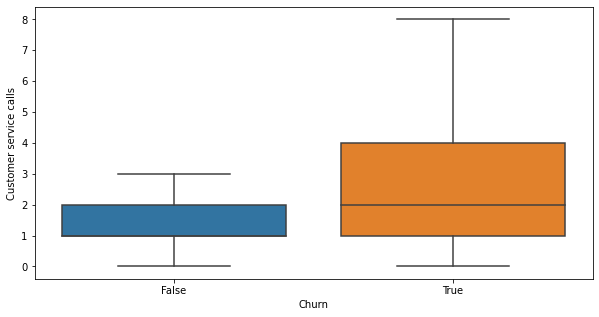

In [89]:
plt.figure(figsize=(10,5))
sb.boxplot(y='Customer service calls', x='Churn', data=telecom_df, sym = '');

In [94]:
customer_call_churn = telecom_df.groupby(['Customer service calls'])['Churn'].agg([np.mean]).rename(columns = {'mean':'churn_rate'})
customer_call_churn['number'] = customer_call_churn.index.values


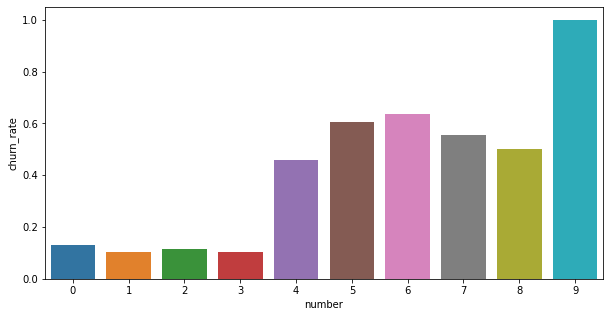

In [96]:
plt.figure(figsize=(10,5))
sb.barplot(y='churn_rate', x='number', data=customer_call_churn)

From this bar plot, it is clearly seen that the users who are calling customer care service more than 3 times are churning at higher rate.

In [ ]:
telecom_df.groupby('Churn').agg({'Customer service calls':np.mean})

,Customer service calls
Churn,
False,1.449825
True,2.229814


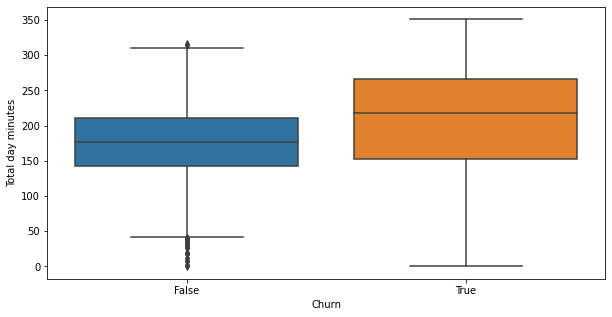

In [ ]:
plt.figure(figsize=(10,5))
sb.boxplot(y='Total day minutes', x='Churn', data=telecom_df)

In [ ]:

corr_df = telecom_df.corr()

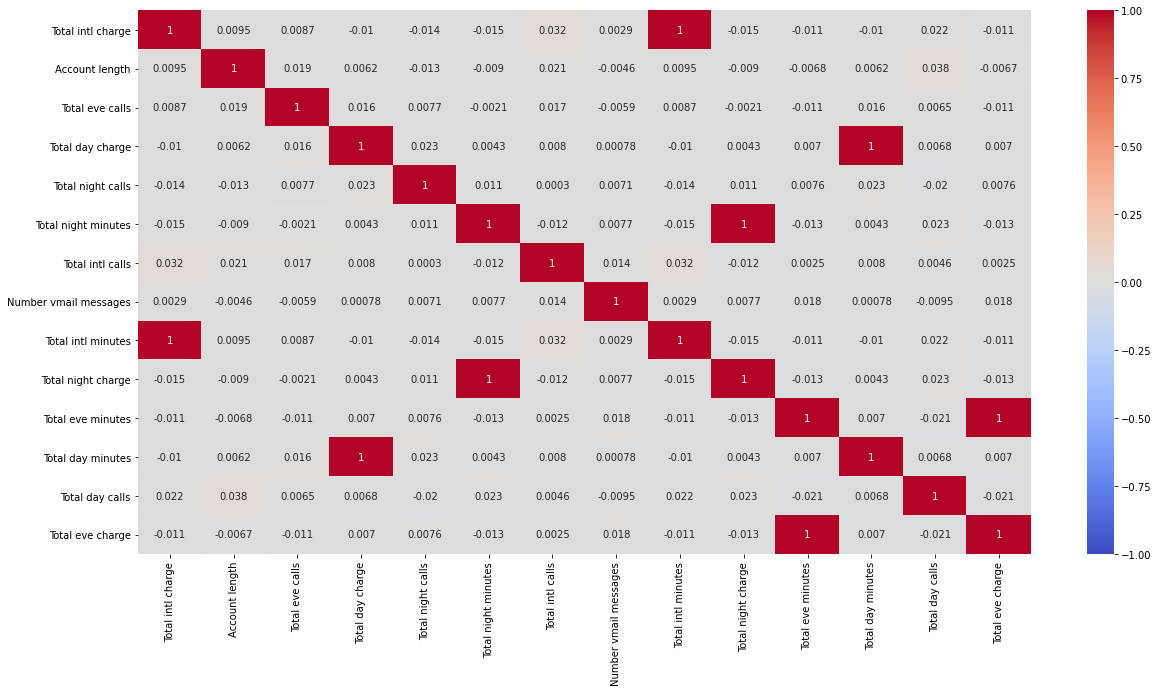

In [ ]:
numerical = list(set(numerical)-set(['total day charge', 'total eve charge', 'total night charge', 'total intl charge']))
corr_matrix = telecom_df[numerical].corr()
plt.figure(figsize=(20,10))
sb.heatmap(corr_matrix, vmin = -1, cmap = 'coolwarm', annot = True);

In [97]:
#sb.regplot(data = telecom_df, x = 'Total day charge', y = 'Total day minutes', x_jitter=0.3, scatter_kws = {'alpha' : 1/20})

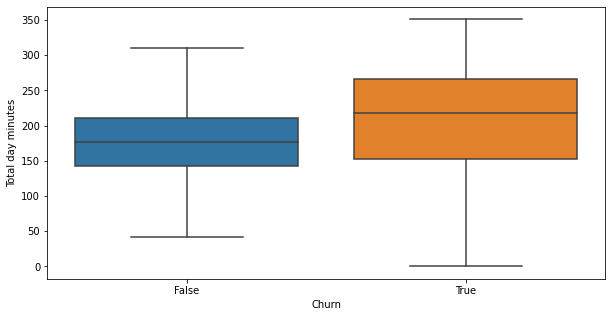

In [114]:
plt.figure(figsize=(10,5))
sb.boxplot(y='Total day minutes', x='Churn', data=telecom_df, sym = '')

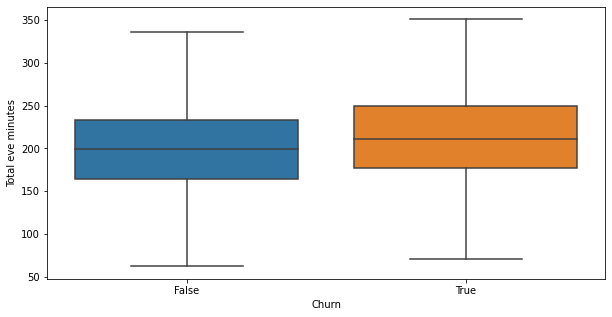

In [115]:
plt.figure(figsize=(10,5))
sb.boxplot(y='Total eve minutes', x='Churn', data=telecom_df, sym = '');

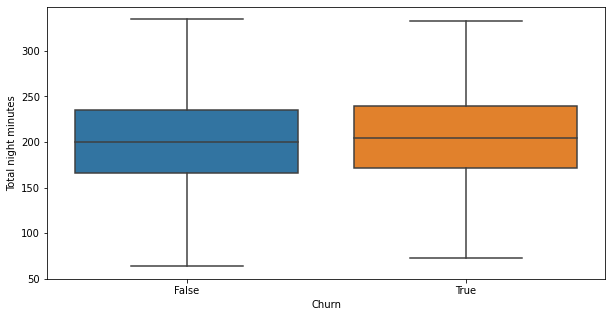

In [116]:
plt.figure(figsize=(10,5))
sb.boxplot(y='Total night minutes', x='Churn', data=telecom_df,sym = '');

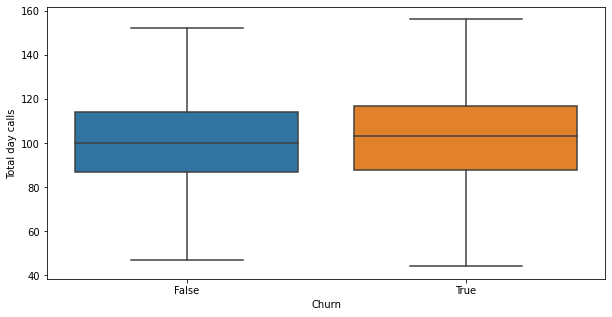

In [117]:
plt.figure(figsize=(10,5))
sb.boxplot(y='Total day calls', x='Churn', data=telecom_df,sym = '');

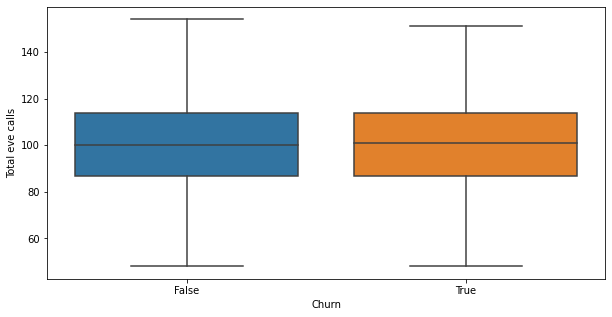

In [118]:
plt.figure(figsize=(10,5))
sb.boxplot(y='Total eve calls', x='Churn', data=telecom_df,sym = '');

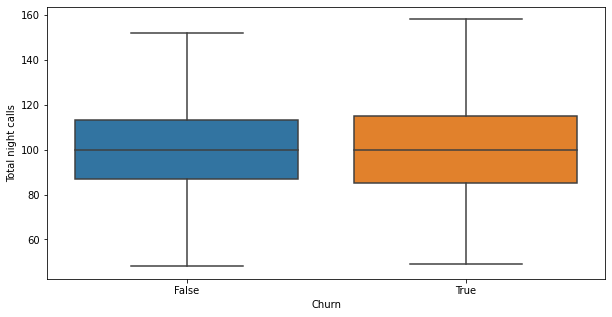

In [119]:
plt.figure(figsize=(10,5))
sb.boxplot(y='Total night calls', x='Churn', data=telecom_df,sym = '');

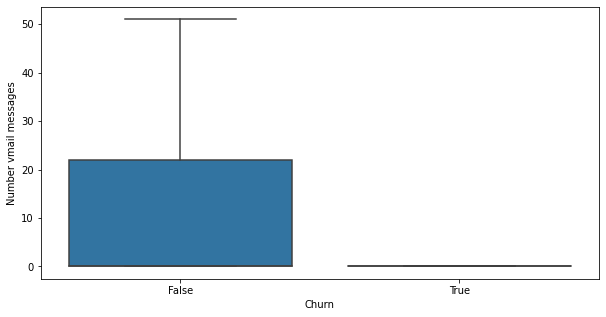

In [121]:
plt.figure(figsize=(10,5))
sb.boxplot(y='Number vmail messages', x='Churn', data=telecom_df,sym = '');

In [ ]:
#telecom_df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by = 'mean', ascending=False).rename(columns = {'mean':'churn_rate'})

In [ ]:
telecom_df['Customer_calls_beyond_3'] = (telecom_df['Customer service calls'] > 3)

In [ ]:
telecom_df['Customer_calls_less_equal_3'] = (telecom_df['Customer service calls'] <= 3)

In [ ]:
telecom_df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Customer_calls_beyond_3
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,False
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,False
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,False
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,False
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,False
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False,False
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False,False
7,MO,147,415,True,False,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False,False
8,LA,117,408,False,False,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False,False
9,WV,141,415,True,True,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False,False


In [ ]:
telecom_df['Cust_calls_beyond_3_Intl_plan'] = (telecom_df['Customer_calls_beyond_3'] & telecom_df['International plan'])

In [ ]:
telecom_df['Cust_calls_beyond_3_voice_plan'] = (telecom_df['Customer_calls_beyond_3'] & telecom_df['Voice mail plan'])

In [ ]:
#pd.crosstab(telecom_df["Customer_calls_beyond_3"] & telecom_df["International plan"], telecom_df["Churn"])

In [ ]:
telecom_df['Cust_calls_leq_3_Intl_plan'] = (telecom_df['Customer_calls_less_equal_3'] & telecom_df['International plan'])

In [ ]:
telecom_df['Cust_calls_leq_3_voice_plan'] = (telecom_df['Customer_calls_less_equal_3'] & telecom_df['Voice mail plan'])

In [ ]:
telecom_df['Churn_with_intl_plan'] = (telecom_df['Churn'] & telecom_df['Cust_calls_beyond_3_Intl_plan'])

In [ ]:
telecom_df['Churn_with_voice_plan'] = (telecom_df['Churn'] & telecom_df['Cust_calls_beyond_3_voice_plan'])

In [ ]:
telecom_df.groupby([ 'Voice mail plan', 'International plan', 'Customer_calls_beyond_3','Churn']).agg({'Churn':'count','Customer service calls': np.mean})

Churn  Customer service calls
Voice mail plan International plan Customer_calls_beyond_3 Churn                               
No              No                 False                   False   1796                1.332405
                                                           True     207                1.265700
                                   True                    False     82                4.390244
                                                           True      95                4.736842
                Yes                False                   False    125                1.280000
                                                           True      88                1.170455
                                   True                    False      5                4.000000
                                                           True      13                4.230769
Yes             No                 False                   False    748                1.267380
                                                           True      20                1.650000
                                   True                    False     38                4.684211
                                                           True      24                4.666667
                Yes                False                   False     52                1.096154
                                                           True      30                1.000000
                                   True                    False      4                4.000000
                                                           True       6                5.333333

In [ ]:
telecom_df.groupby('State').agg({'State':'count', 'Voice mail plan':np.sum,'International plan':np.sum, 'Customer_calls_beyond_3':np.sum, 'Cust_calls_beyond_3_voice_plan':np.sum, 'Cust_calls_beyond_3_Intl_plan':np.sum, 'Churn':np.sum, 'Churn_with_intl_plan':np.sum,'Churn_with_voice_plan':np.sum})

,State,Voice mail plan,International plan,Customer_calls_beyond_3,Cust_calls_beyond_3_voice_plan,Cust_calls_beyond_3_Intl_plan,Churn,Churn_with_intl_plan,Churn_with_voice_plan
State,,,,,,,,,
AK,52,16,4,3,0,0,3,0,0
AL,80,21,8,6,0,1,8,1,0
AR,55,14,8,8,2,3,11,2,1
AZ,64,19,3,7,0,0,4,0,0
CA,34,11,4,5,2,0,9,0,1
CO,66,19,4,9,2,0,9,0,0
CT,74,21,8,5,3,0,12,0,1
DC,54,18,5,3,1,0,5,0,0
DE,61,15,10,5,1,1,9,1,0


In [ ]:
numerical = list(set(telecom_df.columns)-set(['State', 'International plan', 'Voice mail plan',
                                     'Area code', 'Churn']))

In [ ]:
numerical

['Total day charge',
 'Total day minutes',
 'Number vmail messages',
 'Total intl calls',
 'Total night minutes',
 'Total night charge',
 'Total day calls',
 'Total night calls',
 'Total eve calls',
 'Total eve minutes',
 'Total intl minutes',
 'Customer service calls',
 'Total eve charge',
 'Total intl charge',
 'Account length']

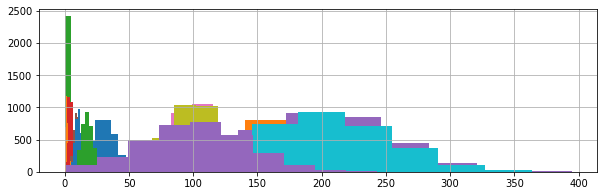

In [ ]:


for i,col in enumerate(numerical):
  telecom_df[col].hist(figsize=(10,3))





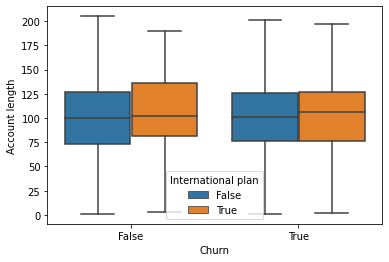

In [ ]:
sb.boxplot(x= 'Churn', y = 'Account length', data = telecom_df, sym = '', hue = 'International plan')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


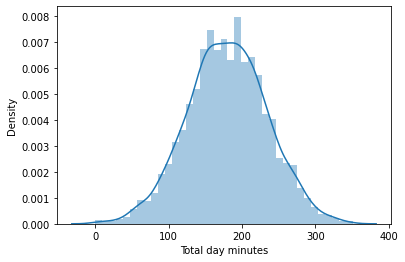

In [ ]:
sb.distplot(telecom_df['Total day minutes'])
plt.show()

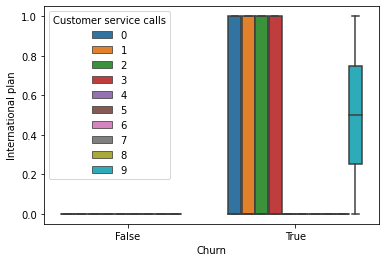

In [98]:
sb.boxplot(x = 'Churn',
            y = 'International plan',
            data = telecom_df,
            sym = "",
            hue = "Customer service calls")